# Part 1

Note to grader: For my responses, I will be using the abbreviations SW for Smith-Waterman and NW for Needleman-Wunsch. For the alignment matrices, the match/mismatch matrix is denoted as m, seq1 gap matrix as ix, and the seq2 gap matrix as iy.

Question 1:

a) For initialization, both SW and NW require a match/mismatch score matrix, gap opening penalty, gap extension penalty, alignment matrices (m, ix, iy), and pointer matrices for the traceback in order to traverse through the alignment matrices to find the optimal alignment. They also require two sequences that the user wishes to align. For execution, they require the matrices to be initialized and a dynamic programming approach for incrementally filling them in. Then, a traceback start point is used in conjunction with the matrices to traceback through the matrices to find the alignment. For termination, they require an end condition for the traceback.

b) For both, when the align() method is called, the alignment is returned. For SW, this is a local alignment of the two sequences. For NW, this is a global alignment of the two sequences. Gaps in the alignment are represented using dashes (“-”). In my implementation, the alignment score is also accessible as a class attribute (or using the score() method).

c) For both, there are two main parts to the algorithm: filling out the matrices and doing the traceback. For this question, let m = length(seq1) and n = length(seq2). The runtime complexity of the dynamic programming approach to fill out the alignment matrices is O(m*n) because of the nested for loops. The runtime complexity of the traceback is O(n) because you just go through the alignment once. The overall runtime complexity of the algorithms is the highest of the runtime complexities of the parts. So for both SW and NW, the runtime complexity is O(m*n).

Question 2:

Both require alignment parameters (score matrix & gap penalties) for initialization. Both require sequences to be inputted (as strings in my implementation). Both have three alignment matrices, but those matrices are initialized differently between the two algorithms. For SW, the top row and the left column of m is initialized to 0. The top row and left column of ix and iy are initialized to -inf. For NW, the (0,0) cell of m is initialized to 0. The left column of the ix initialized to: gap opening penalty + (gap extension penalty * row number). The top row of iy is initialized to: gap opening penalty + (gap extension penalty * column number). For both, all other cells in the top row and left column are initialized to -inf. For both, I had 3 pointer matrices (one for each alignment matrix).

For execution, the recurrence relations to fill out the alignment matrices are virtually identical. The only difference is that for SW, when evaluating each cell in m, an additional option is added: 0. Since the recurrence relation finds the max of the score options for that cell and 0 is now also an option, this ensures that there are no negative values in m for SW. For both NW and SW, as the matrices are filled out using dynamic programming, the origin of each score is stored in pointer matrices to enable traceback.

For SW, the traceback starts at the maximum match/mismatch matrix value. For NW, the traceback starts at the bottom right cell of the matrix with the highest value there. For both, the traceback continues through the alignment score matrices using the pointer matrices as guidance about where to go next from each cell. For termination, the SW traceback ends when the traceback hits a 0 value. For NW, the traceback ends when the traceback hits the top left corner.

Question 3:

Affine-gap alignment requires 3 alignment matrices, whereas linear-gap alignment only requires 1. For affine-gap alignment, this means that when filling out each cell in each matrix, values from cells in other matrices are used. Additionally, for linear-gap alignment, only 1 pointer matrix is required. For affine-gap alignment, the pointers are a bit more complicated since they refer to both cell locations and matrix types. There are many ways to implement this. For my implementation I had 3 pointer matrices (one for each alignment matrix) that point to the type (m, ix, iy) that the current cell value in the alignment matrix came from. For linear-gap alignment, the traceback walks through a single alignment matrix. For affine-gap alignment, the traceback can walk through all three alignment matrices.

Question 4:

My API is in my README.md in my github repo.

Question 5:

I implemented overlap alignment. There is also a unit test for it (both aligning & scoring).

# Part 2

In [2]:
# Import classes
from align import algs

### Question 1

In [3]:
# Load fasta file names for alignments
def load_pairs(pairs_txt_file):
    # Read in pairs
    with open(pairs_txt_file) as pf:
        # Read in each line, remove whitespace, and make list of tuples representing each pair
        pairs_files = [tuple(line.strip().split()) for line in pf]
    return pairs_files

# Load sequences given fasta file names
def load_sequences(fasta_file_names):
    pa = algs.PairwiseAligner("BLOSUM50", -3, -1)
    sequence_pairs = [tuple([pa.load_fasta(f1), pa.load_fasta(f2)]) for (f1, f2) in fasta_file_names]
    return sequence_pairs

def get_q1_scores(allpairs):
    sw = algs.SmithWaterman("BLOSUM50", -11, -3)
    sw.load_scoring_matrix()
    scores = []
    for (s1, s2) in allpairs:
        s = sw.score(s1, s2)
        scores.append(s)
    return scores

# Read in names of fasta files for true & false alignments
pospairs_files = load_pairs("scoring_matrices/Pospairs.txt")
negpairs_files = load_pairs("scoring_matrices/Negpairs.txt")
# Read in sequences from those fasta files
pospairs = load_sequences(pospairs_files)
negpairs = load_sequences(negpairs_files)
allpairs = pospairs + negpairs
# Get alignment scores
q1_alignment_scores = get_q1_scores(allpairs)
with open("part2_results_data/q1.txt", "w") as q1:
    q1.writelines("%s\n" % score for score in q1_alignment_scores)

In [4]:
import matplotlib.pyplot as plt

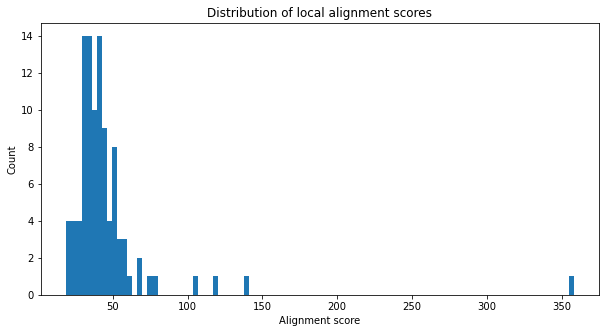

In [5]:
plt.rcParams["figure.figsize"] = (10,5)
plt.hist(q1_alignment_scores, bins=100)
plt.title("Distribution of local alignment scores")
plt.xlabel("Alignment score")
plt.ylabel("Count")
plt.savefig("part2_plots/q1.png")

I would describe this distribution as right-skewed with a peak around 40. Most of the scores seem to be between 20-80. There are a few scores at 100-150 and up around 260.

### Question 2

In [6]:
# Find average alignment score
q2_avg_score = sum(q1_alignment_scores)/len(q1_alignment_scores)
q2_avg_score

45.44

In [9]:
import sklearn
from sklearn import metrics

In [10]:
# Make a list of predictions of whether 2 sequences align or not
q2_preds = [s >= q2_avg_score for s in q1_alignment_scores]
# Make a list of true values (first 50 are True and last 50 are False)
q2_reals = [True]*50 + [False]*50
# Make confusion matrix
q2_preds_and_reals = list(zip(q2_preds, q2_reals))
q2_tp = sum([(p == True and r == True) for (p, r) in q2_preds_and_reals])
q2_fp = sum([(p == True and r == False) for (p, r) in q2_preds_and_reals])
q2_tn = sum([(p == False and r == False) for (p, r) in q2_preds_and_reals])
q2_fn = sum([(p == False and r == True) for (p, r) in q2_preds_and_reals])
# Print results
print("CONFUSION MATRIX")
print("           Predicted")
print("           True   False")
print("Real  True  " + str(q2_tp) + "    " + str(q2_fn))
print("      False " + str(q2_fp) + "     " + str(q2_tn))

CONFUSION MATRIX
           Predicted
           True   False
Real  True  22    28
      False 6     44


The threshold value (average alignment score) is 45.44. The confusion matrix suggests that the algorithm detected false alignments pretty well (44/50), but did not detect true alignments well (22/50). The threshold was set using the mean, which is sensitive to outliers, which the score distribution has. If the threshold was a bit lower, we would probably detect true alignments better, but also would have more false positives.

### Question 3

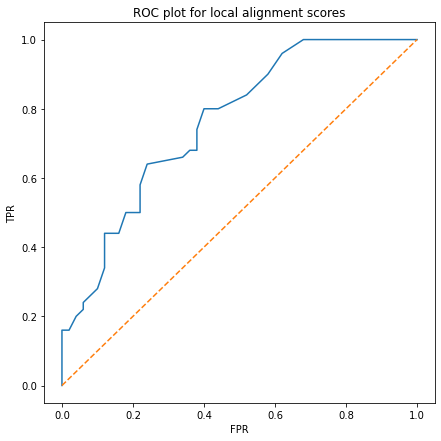

In [37]:
# Make ROC plot
q3_fpr, q3_tpr, q3_ts = sklearn.metrics.roc_curve(q2_reals, q1_alignment_scores)
plt.rcParams["figure.figsize"] = (7,7)
plt.plot(q3_fpr, q3_tpr)
plt.plot([0,1], [0,1], linestyle="dashed")
plt.title("ROC plot for local alignment scores")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.savefig("part2_plots/q3.png")

### Question 4

In [12]:
q4_auroc = sklearn.metrics.roc_auc_score(q2_reals, q1_alignment_scores)
q4_auroc

0.76

The auROC is 0.76. This indicates that the algorithm is performing good, not great. It's greater than 0.5 so it's definitely better than random chance, but it's well below 1 so it's not performing perfectly. You can not confidently assess the performance of this algorithm with this value alone. Depending on what you are using this algorithm for, you may care more about detecting any possible alignment (perhaps for maximizing hypothesis generation) or you may care more about only focusing on very likely alignments (perhaps for minimizing computational costs). The auROC is just one summary statistic and doesn't give granular information about algorithm performance. Some examples of other important values are sensitivity, specificity, and accuracy.

### Question 5

In [15]:
# For each gap opening cost
for i in range(-20,0):
    # For each gap extension cost
    for j in range(-5,0):
        sw = algs.SmithWaterman("BLOSUM62", i, j)
        sw.load_scoring_matrix()
        scores = []
        for (s1, s2) in allpairs:
            s = sw.score(s1, s2)
            scores.append(s)
        with open("part2_results_data/q5/" + str(i) + "_" + str(j) + ".txt", "w") as q5_out:
            q5_out.writelines("%s\n" % score for score in scores)

In [26]:
# Load q5 scores
def analyze_q5_scores(score_file):
    # Read in scores
    with open(score_file) as sf:
        scores = [line.strip() for line in sf]
    # Compute auROC
    scores_int = list(map(int, scores))
    auroc = sklearn.metrics.roc_auc_score(q2_reals, scores_int)
    return auroc

# Make a list where each element is a tuple: (GOP, GEP, auROC)
q5_gap_auroc = []
# Populate dictionary
for i in range(-20,0):
    for j in range(-5,0):
        score_file = "part2_results_data/q5/" + str(i) + "_" + str(j) + ".txt"
        auroc = analyze_q5_scores(score_file)
        q5_gap_auroc.append((i, j, auroc))

# Sort by auROC
q5_gap_auroc.sort(key=lambda n: n[2], reverse=True)
q5_gap_auroc

[(-2, -3, 0.8432),
 (-1, -4, 0.8400000000000001),
 (-4, -2, 0.8363999999999999),
 (-1, -3, 0.8352000000000002),
 (-3, -2, 0.8316000000000001),
 (-6, -1, 0.8241999999999999),
 (-5, -2, 0.8224),
 (-3, -3, 0.8220000000000001),
 (-5, -1, 0.8161999999999999),
 (-2, -2, 0.8144),
 (-7, -1, 0.8128),
 (-2, -4, 0.8102),
 (-6, -2, 0.8098),
 (-4, -3, 0.8096),
 (-1, -5, 0.8079999999999999),
 (-3, -4, 0.8039999999999999),
 (-4, -1, 0.8038),
 (-8, -1, 0.8012),
 (-9, -1, 0.7964),
 (-2, -5, 0.7946),
 (-7, -2, 0.7938),
 (-5, -3, 0.7926000000000001),
 (-1, -2, 0.7919999999999999),
 (-3, -1, 0.7908),
 (-10, -1, 0.7891999999999999),
 (-4, -4, 0.7872),
 (-8, -2, 0.7858),
 (-9, -5, 0.7834000000000001),
 (-6, -3, 0.7832),
 (-11, -4, 0.7824000000000001),
 (-10, -5, 0.7824000000000001),
 (-10, -4, 0.7822),
 (-11, -5, 0.7816000000000001),
 (-13, -3, 0.7816),
 (-12, -4, 0.7816),
 (-12, -3, 0.7811999999999999),
 (-2, -1, 0.781),
 (-11, -3, 0.7807999999999999),
 (-12, -2, 0.7806),
 (-8, -5, 0.7798),
 (-14, -2, 0.77

In [27]:
# Find the best gap penalty
q5_gap_auroc[0]

(-2, -3, 0.8432)

The gap penalty that performed "best" was a gap opening cost of 2 and a gap extension cost of 3. This pair of values could reflect any number of possible evolution trajectories. It's a relatively low gap penalty, especially for gap opening. This suggests that gaps are relatively frequent in these sequences, which could be a result of many small evolutionary changes, as opposed to large structural changes. Alternatively, perhaps there were very many overlapping structural changes that caused there to be lots of small sequence differences scattered throughout the sequences. It's also possible that these sequences are just really not closely related.

### Question 6

In [33]:
# Make function for getting q6 scores
def get_q6_scores(score_matrix_type, overlap=False):
    nw = algs.NeedlemanWunsch(score_matrix_type, -2, -3)
    nw.load_scoring_matrix()
    scores = []
    if overlap == True:
        for (s1, s2) in allpairs:
            s = nw.score(s1, s2, overlap=True)
            scores.append(s)
    else:
        for (s1, s2) in allpairs:
            s = nw.score(s1, s2)
            scores.append(s)
    # Compute auROC
    auroc = sklearn.metrics.roc_auc_score(q2_reals, scores)
    return scores, auroc

# Evaluate performance of global alignment using the 4 scoring matrices
q6_b50_scores, q6_b50_auroc = get_q6_scores("BLOSUM50")
q6_b62_scores, q6_b62_auroc = get_q6_scores("BLOSUM62")
q6_p100_scores, q6_p100_auroc = get_q6_scores("PAM100")
q6_p250_scores, q6_p250_auroc = get_q6_scores("PAM250")

# Evaluate performance of overlap alignment
q6_b50_scores_overlap, q6_b50_auroc_overlap = get_q6_scores("BLOSUM50", overlap=True)
q6_b62_scores_overlap, q6_b62_auroc_overlap = get_q6_scores("BLOSUM62", overlap=True)
q6_p100_scores_overlap, q6_p100_auroc_overlap = get_q6_scores("PAM100", overlap=True)
q6_p250_scores_overlap, q6_p250_auroc_overlap = get_q6_scores("PAM250", overlap=True)

# Print results
print("auROCs for global alignments")
print("BLOSUM50: " + str(q6_b50_auroc))
print("BLOSUM62: " + str(q6_b62_auroc))
print("PAM100: " + str(q6_p100_auroc))
print("PAM250: " + str(q6_p250_auroc))
print("auROCs for overlap alignments")
print("BLOSUM50: " + str(q6_b50_auroc_overlap))
print("BLOSUM62: " + str(q6_b62_auroc_overlap))
print("PAM100: " + str(q6_p100_auroc_overlap))
print("PAM250: " + str(q6_p250_auroc_overlap))

auROCs for global alignments
BLOSUM50: 0.8252
BLOSUM62: 0.7813999999999999
PAM100: 0.7632
PAM250: 0.8111999999999999
auROCs for overlap alignments
BLOSUM50: 0.8442
BLOSUM62: 0.8554
PAM100: 0.7094
PAM250: 0.8482


For the global alignments, the auROCS for BLOSUM50, BLOSUM62, PAM100, and PAM250 were 0.83, 0.78, 0.76, and 0.81, respectively. For the overlap alignments (extra credit), the auROCs were 0.84, 0.86, 0.71, and 0.85, respectively.

There seemed to be better performance for the overlap alignments than the global alignments. This could perhaps be explained by the fact that there are relatively small gap opening penalties which were determined by analyzing local alignments. Overlap alignments are more similar to local alignments than global alignments are to local alignments.

For both global and overlap alignments, the best performing score matrices were BLOSUM50 and PAM250. This, in conjuction with the results in q5, suggest that these sequences do not have high degrees of similarity or are not closely related. Both the BLOSUM50 and PAM250 matrices are geared towards sequences that are not super similar.

### Question 7

In [35]:
# Make function for getting q6 scores
def get_q7_scores(score_matrix_type):
    sw = algs.SmithWaterman(score_matrix_type, -2, -3)
    sw.load_scoring_matrix()
    scores = []
    for (s1, s2) in allpairs:
        s = sw.score(s1, s2)
        scores.append(s)
    # Compute auROC
    auroc = sklearn.metrics.roc_auc_score(q2_reals, scores)
    return scores, auroc

# Evaluate performance of local alignment using the 4 scoring matrices
q7_b50_scores, q7_b50_auroc = get_q7_scores("BLOSUM50")
q7_b62_scores, q7_b62_auroc = get_q7_scores("BLOSUM62")
q7_p100_scores, q7_p100_auroc = get_q7_scores("PAM100")
q7_p250_scores, q7_p250_auroc = get_q7_scores("PAM250")

# Print results
print("auROCs for local alignments")
print("BLOSUM50: " + str(q7_b50_auroc))
print("BLOSUM62: " + str(q7_b62_auroc))
print("PAM100: " + str(q7_p100_auroc))
print("PAM250: " + str(q7_p250_auroc))

auROCs for local alignments
BLOSUM50: 0.8078
BLOSUM62: 0.8432
PAM100: 0.8408
PAM250: 0.7898


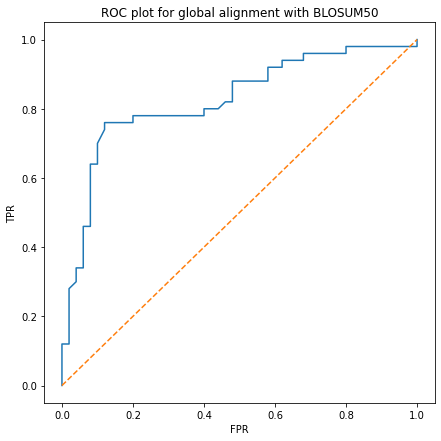

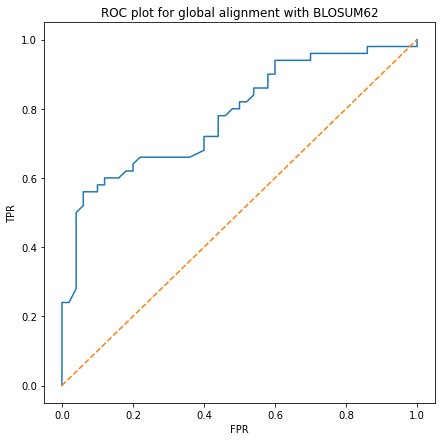

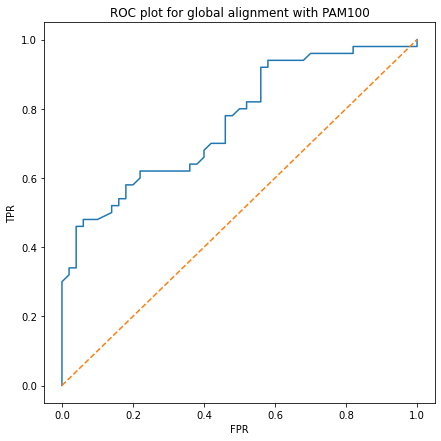

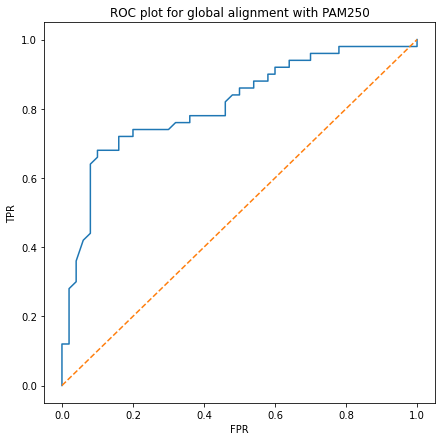

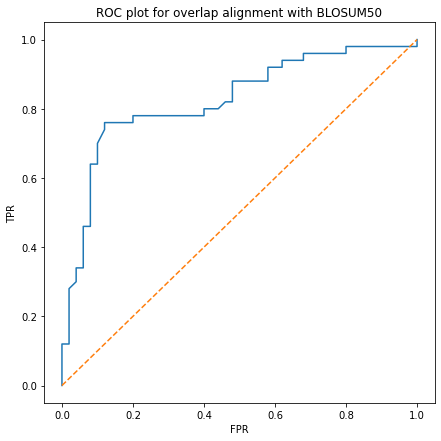

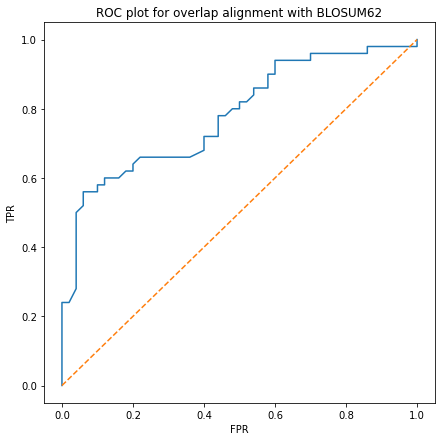

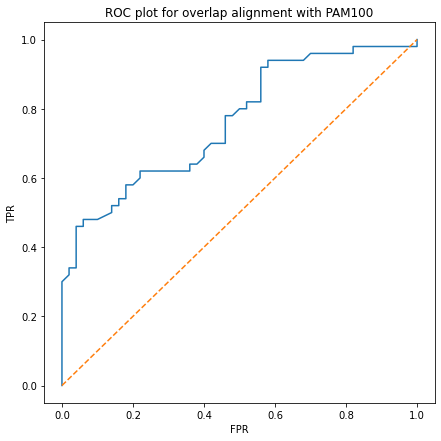

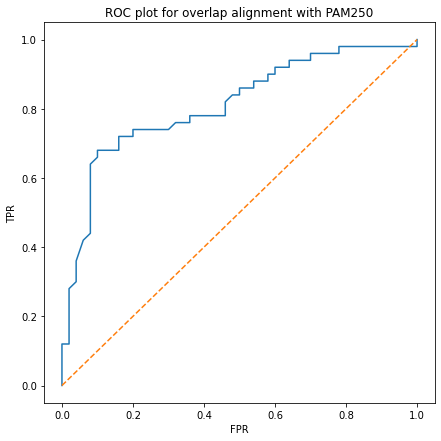

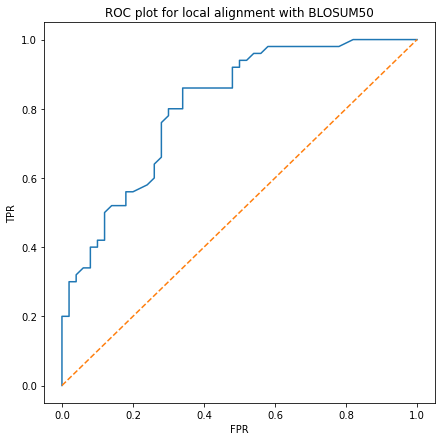

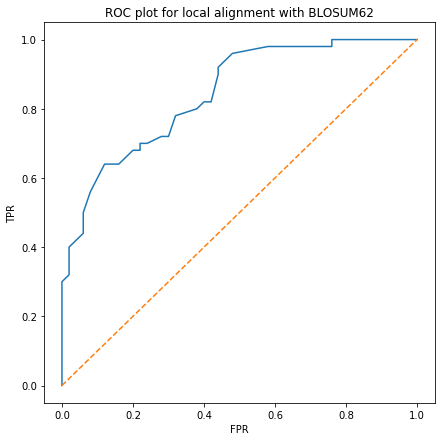

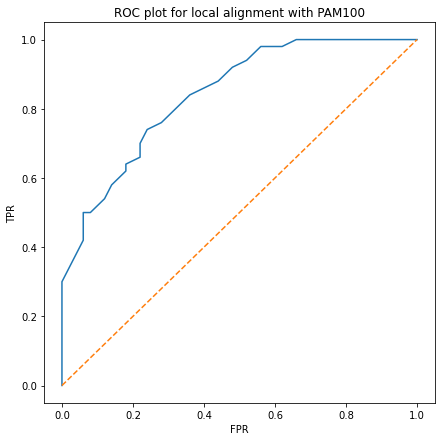

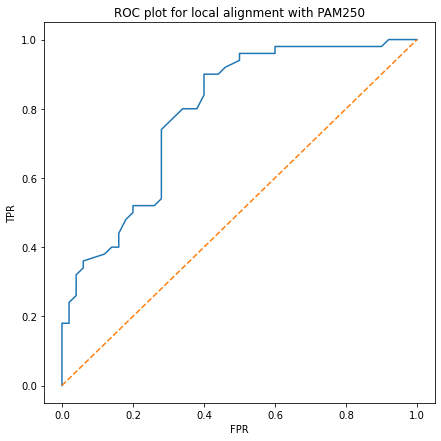

In [40]:
# Make plotting function for this question
def make_q7_plot(scores, alignment_type, matrix_type):
    q3_fpr, q3_tpr, q3_ts = sklearn.metrics.roc_curve(q2_reals, scores)
    plt.rcParams["figure.figsize"] = (7,7)
    plt.plot(q3_fpr, q3_tpr)
    plt.plot([0,1], [0,1], linestyle="dashed")
    plot_title = "ROC plot for " + alignment_type + " alignment with " + matrix_type
    plt.title(plot_title)
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.savefig("part2_plots/q7/" + alignment_type + "_" + matrix_type + ".png")
    plt.show()
    
# Make ROC plots
make_q7_plot(q6_b50_scores, "global", "BLOSUM50")
make_q7_plot(q6_b62_scores, "global", "BLOSUM62")
make_q7_plot(q6_p100_scores, "global", "PAM100")
make_q7_plot(q6_p250_scores, "global", "PAM250")
make_q7_plot(q6_b50_scores, "overlap", "BLOSUM50")
make_q7_plot(q6_b62_scores, "overlap", "BLOSUM62")
make_q7_plot(q6_p100_scores, "overlap", "PAM100")
make_q7_plot(q6_p250_scores, "overlap", "PAM250")
make_q7_plot(q7_b50_scores, "local", "BLOSUM50")
make_q7_plot(q7_b62_scores, "local", "BLOSUM62")
make_q7_plot(q7_p100_scores, "local", "PAM100")
make_q7_plot(q7_p250_scores, "local", "PAM250")

For the local alignments, the auROCS for BLOSUM50, BLOSUM62, PAM100, and PAM250 were 0.81, 0.84, 0.84, and 0.79, respectively.

(All the auROCs for global & overlap alignments are reported in Q6)

Of all these algorithms, one that performs the best as measured by auROC is the overlap alignment with the BLOSUM62 matrix. It has an auROC of 0.85.

### Question 8